# Drug consumption

U ovoj bilježnici promotrit ću i primijeniti pčelinje algortime za odabir podskupa značajki na skupu podataka koji je vezan za konzumiranje droga. Skup podataka se može skinuti na [1] Za razliku od skupa Heart disease i Breast cancer, ovo nije medicinski skup podataka i u sebi ima zapravo 19 zavisnih varijabli i može se promatrati 19 odvojenih klasifikacijskih problema.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Skup podataka ima 32 značajke od kojih je prva ID koju nećemo promatrati, a od 14 nadalje su zavisne varijable svaka vezana za doređenu drogu. Promatrano je 1885 profila osobnosti. Dodatni detalji o značajkama se mogu pronaći također na [1], postoji vrlo detaljan opis klasa i koje su sve droge uključene u istraživanje. Sve varijable, iako imaju realne vrijednosti, a ne vrijednosti cijelih brojeva, su kategoričke.

In [2]:
# Importing the dataset
dataset = pd.read_csv('drug_consumption.data', header=None)
X = dataset.iloc[:, 1:13].values
Y = dataset.iloc[:, 13:32].values
dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [3]:
#types of elements in column in dataframe
dataset.dtypes

0       int64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13     object
14     object
15     object
16     object
17     object
18     object
19     object
20     object
21     object
22     object
23     object
24     object
25     object
26     object
27     object
28     object
29     object
30     object
31     object
dtype: object

Sada ćemo promotriti balansiranost skupa podataka s obzirom na svih 19 droga. U nastavku ćemo promatrat onu drogu za koju skup bude najbalansiraniji. Razlog zašto uopće promatramo je li skup balansiran će bit pojašnjen kasnije.

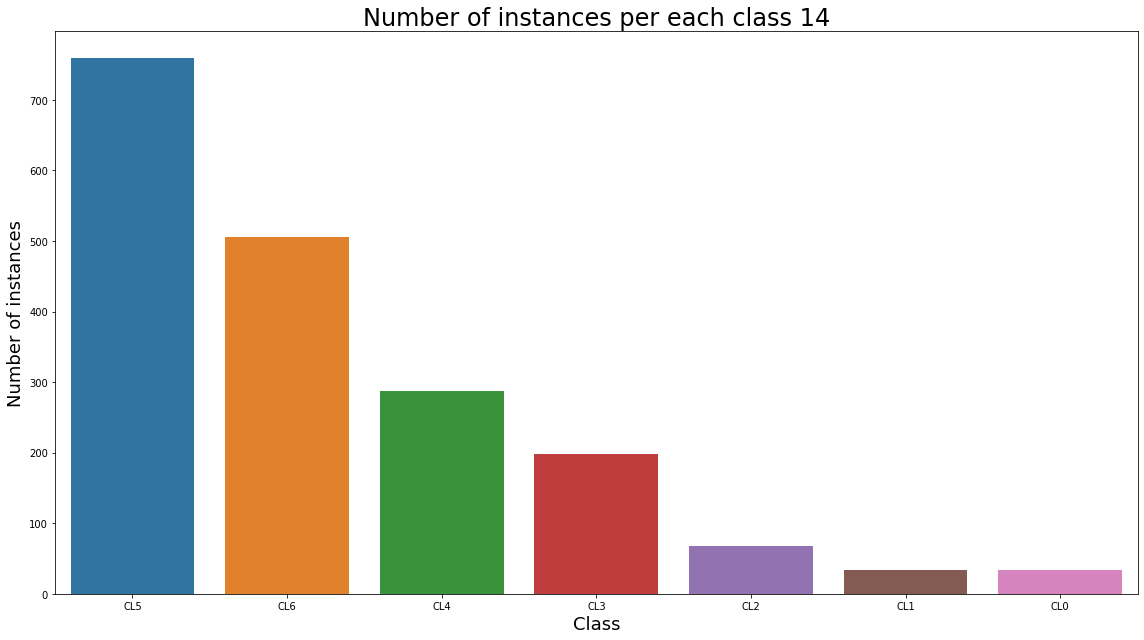

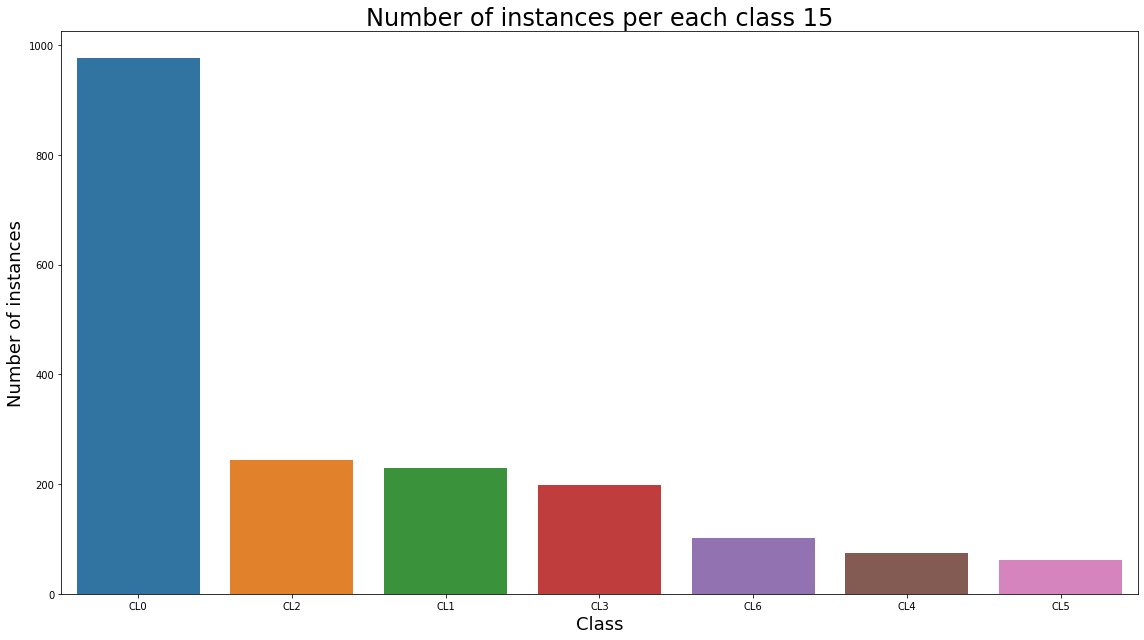

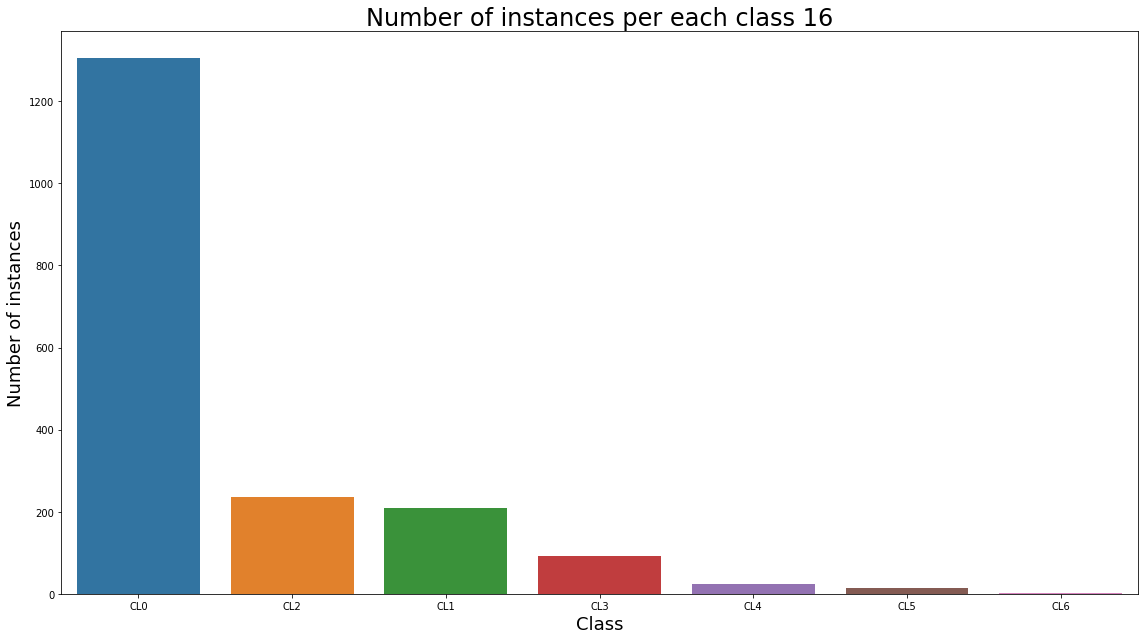

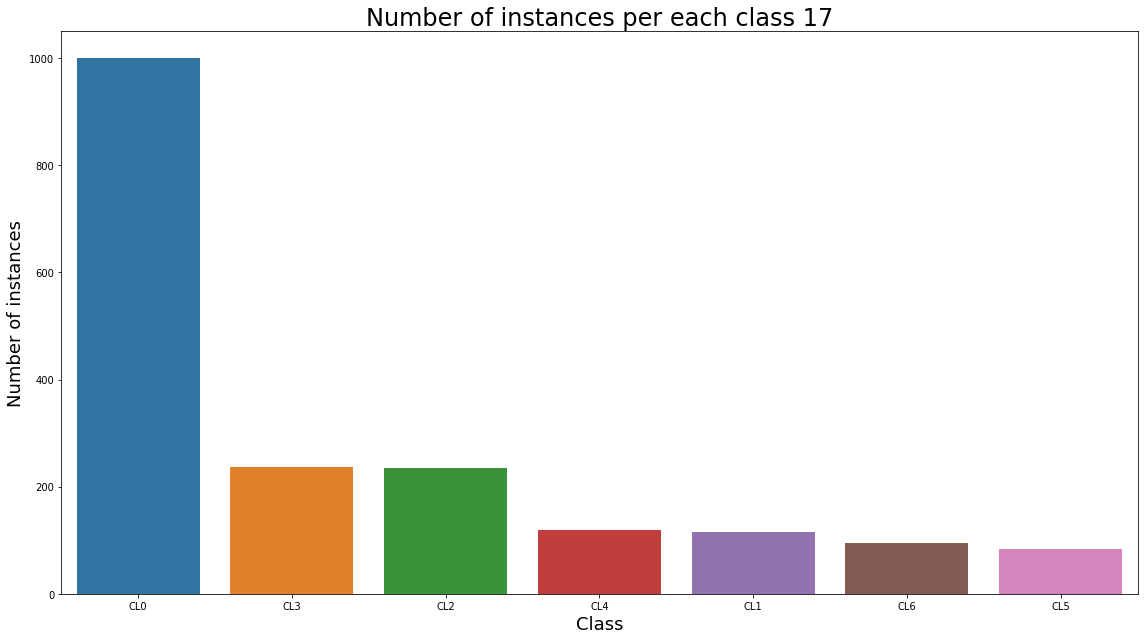

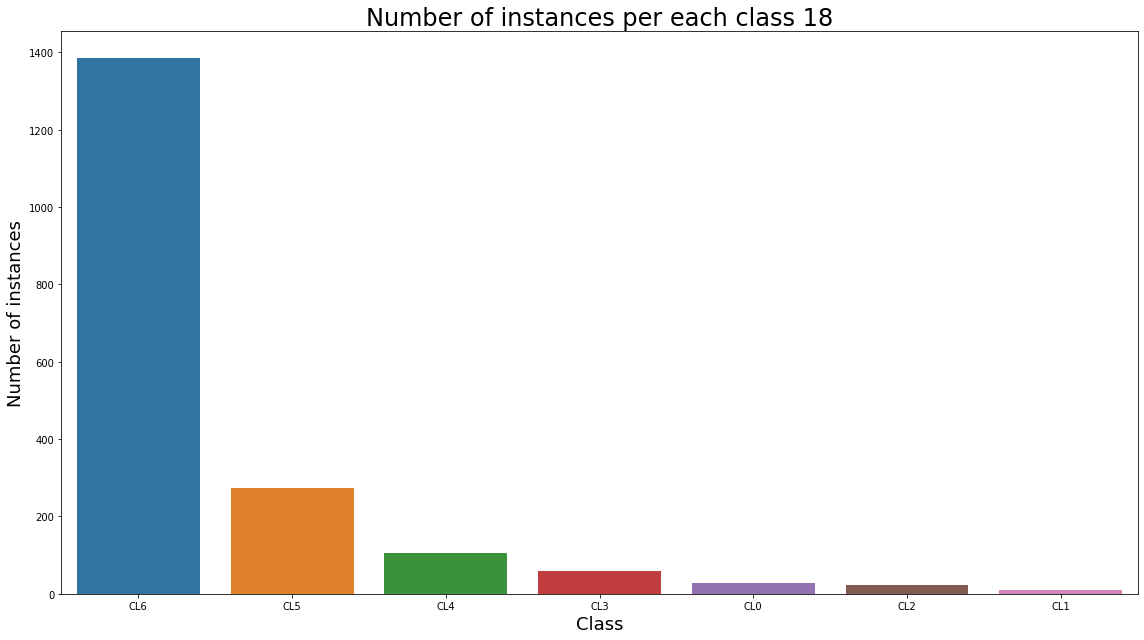

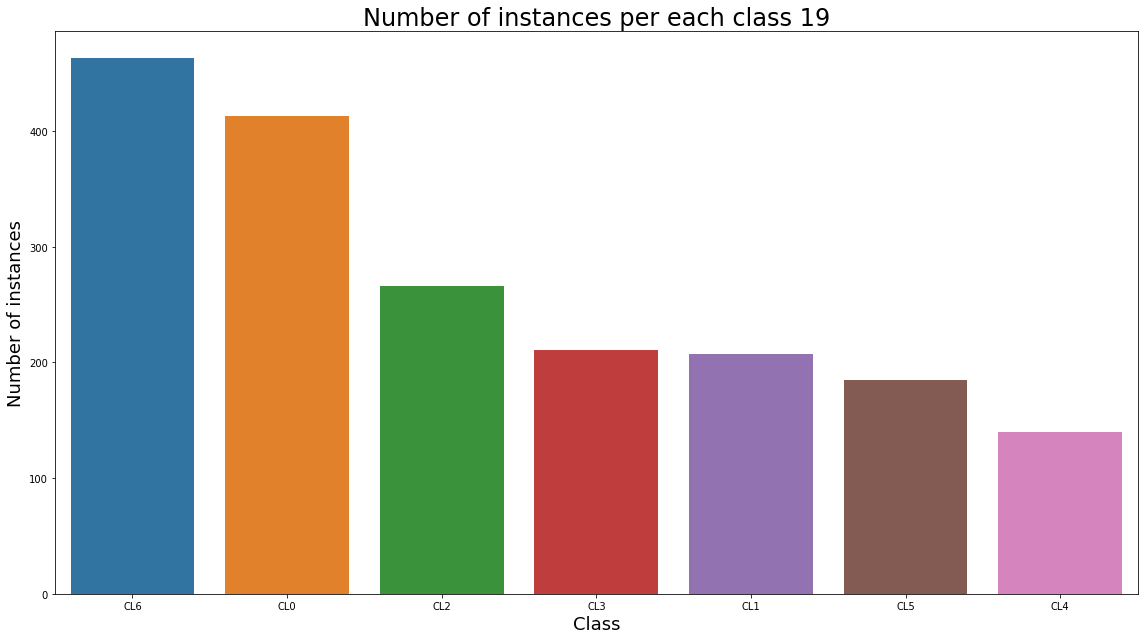

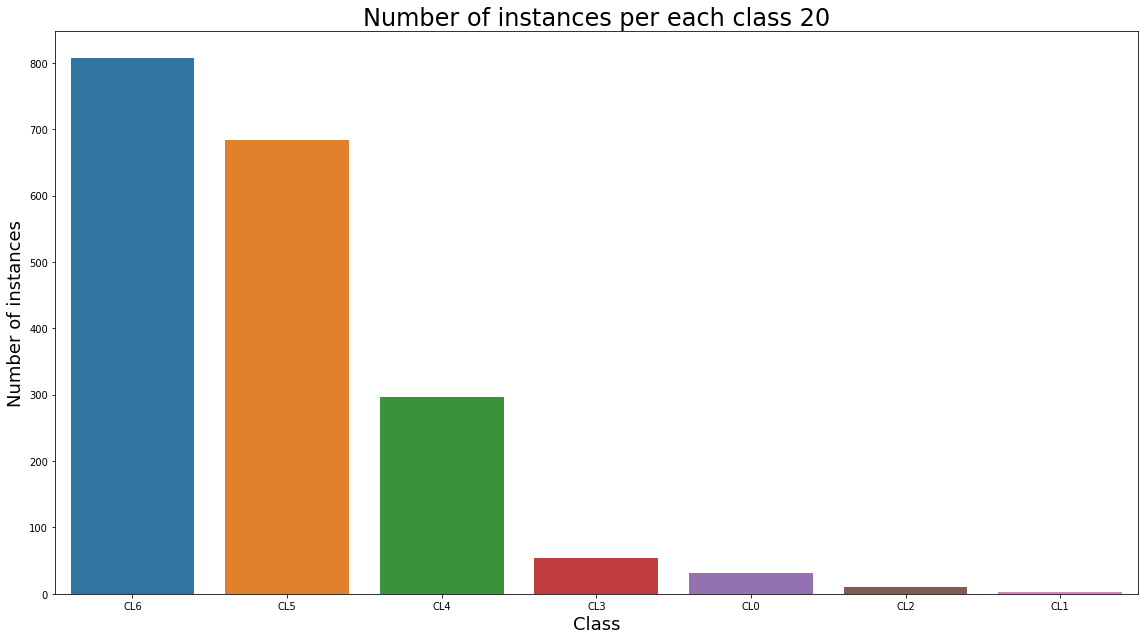

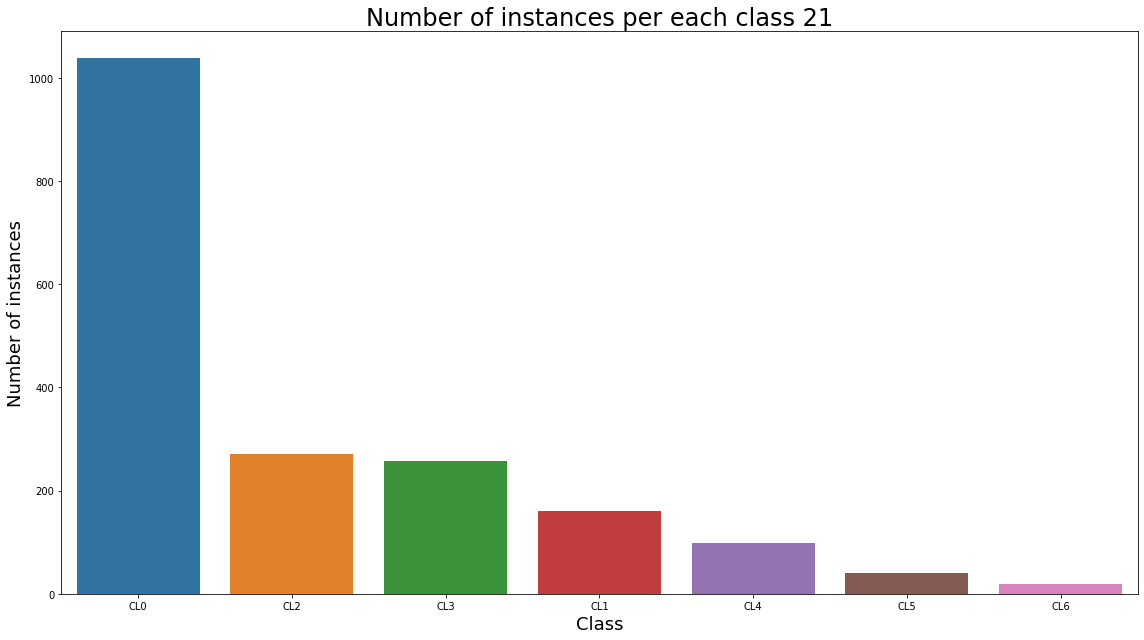

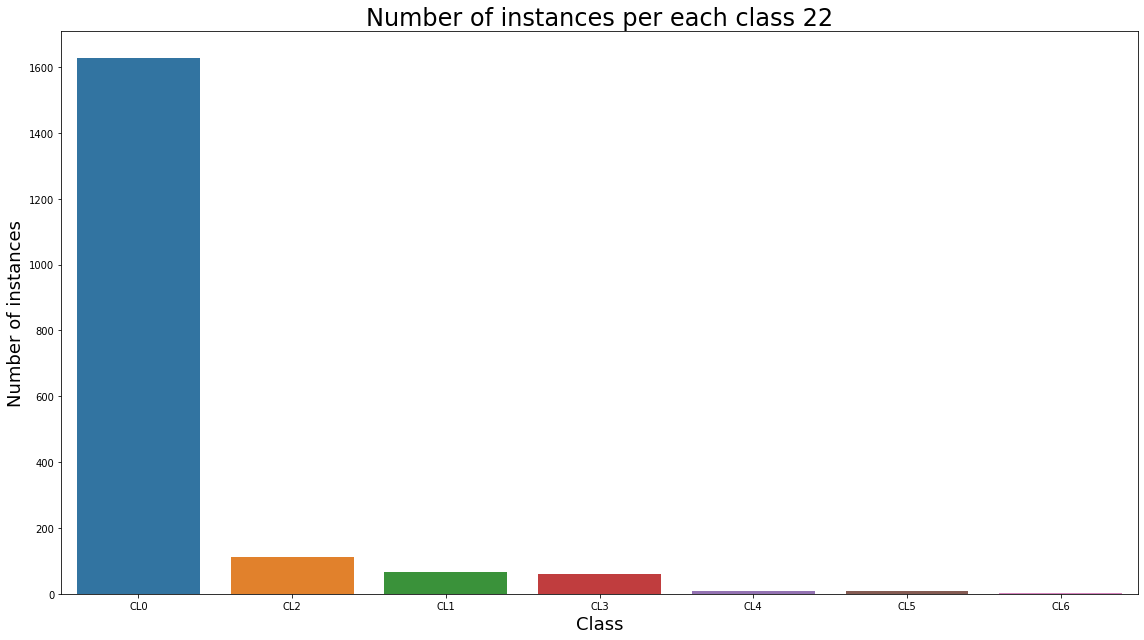

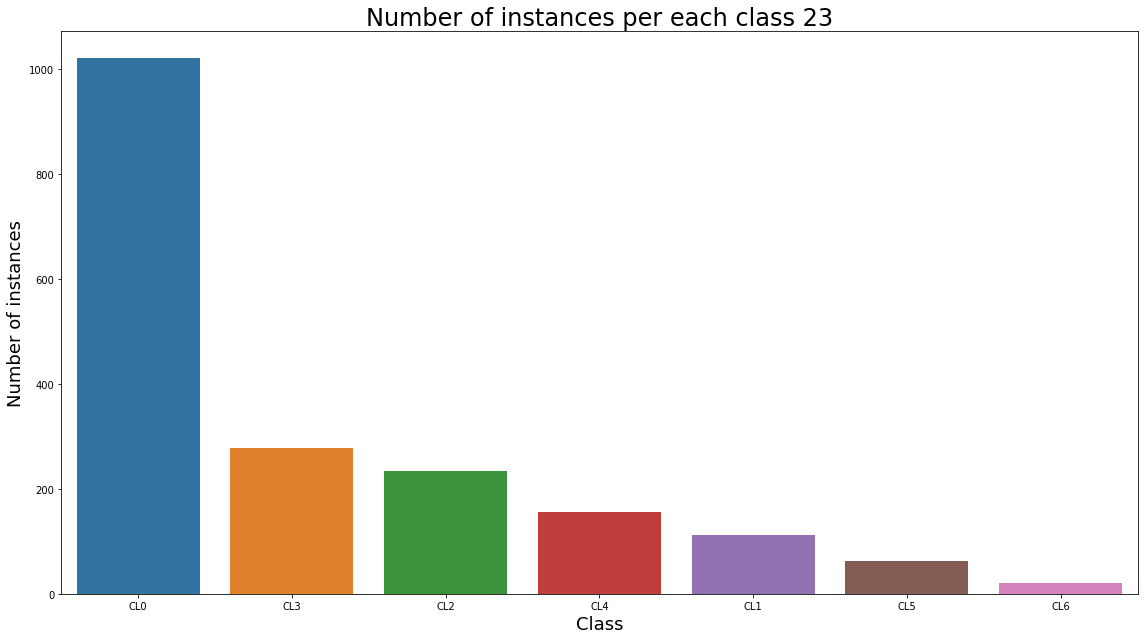

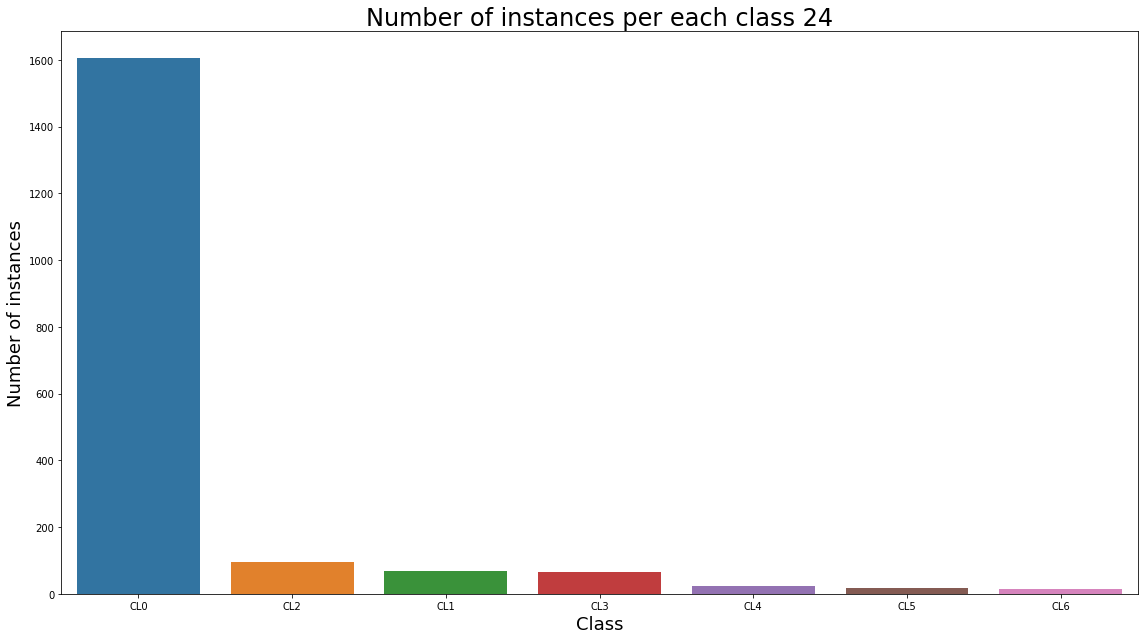

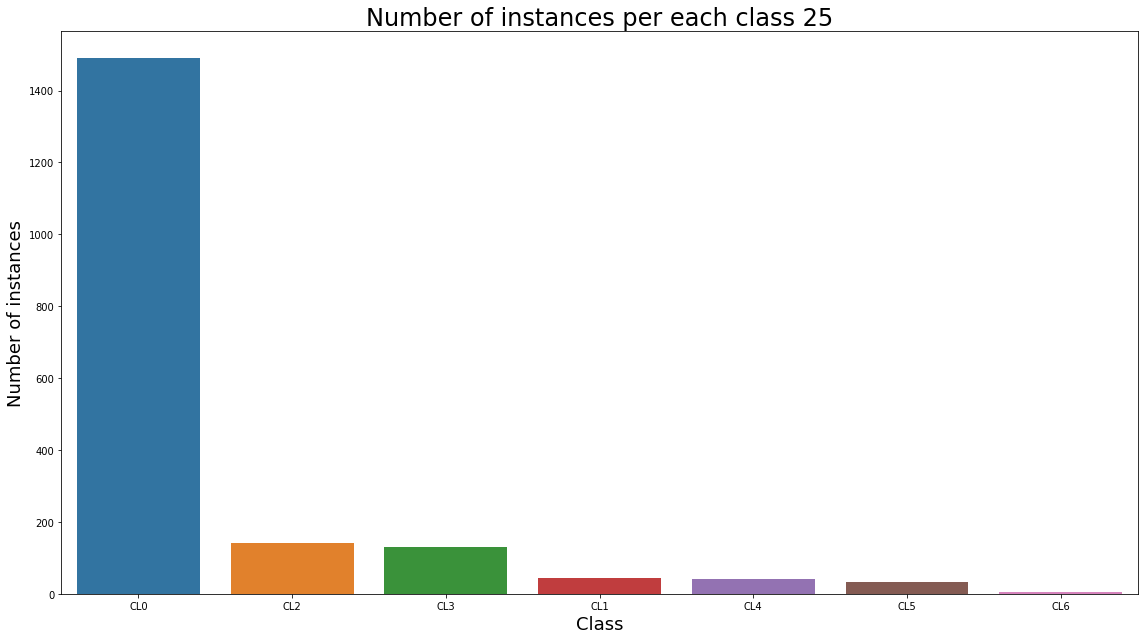

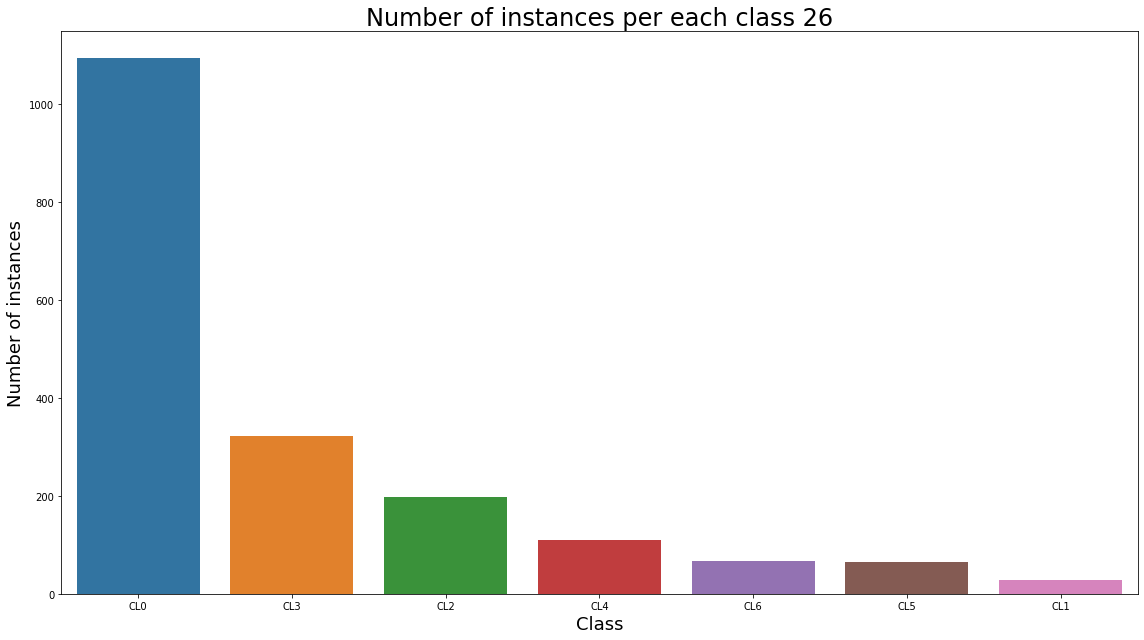

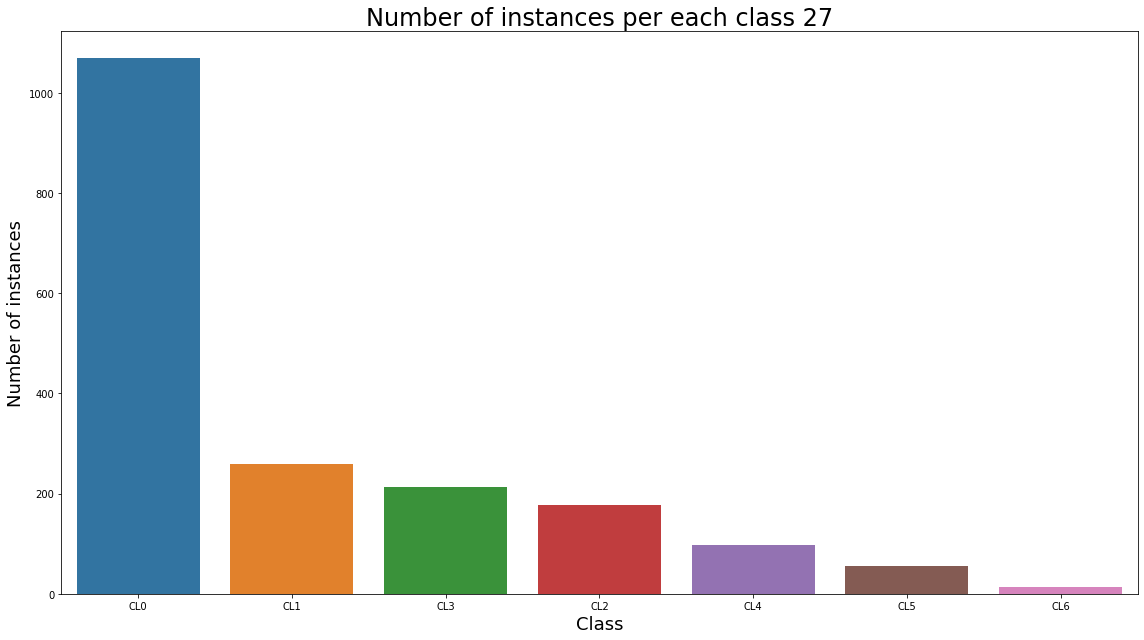

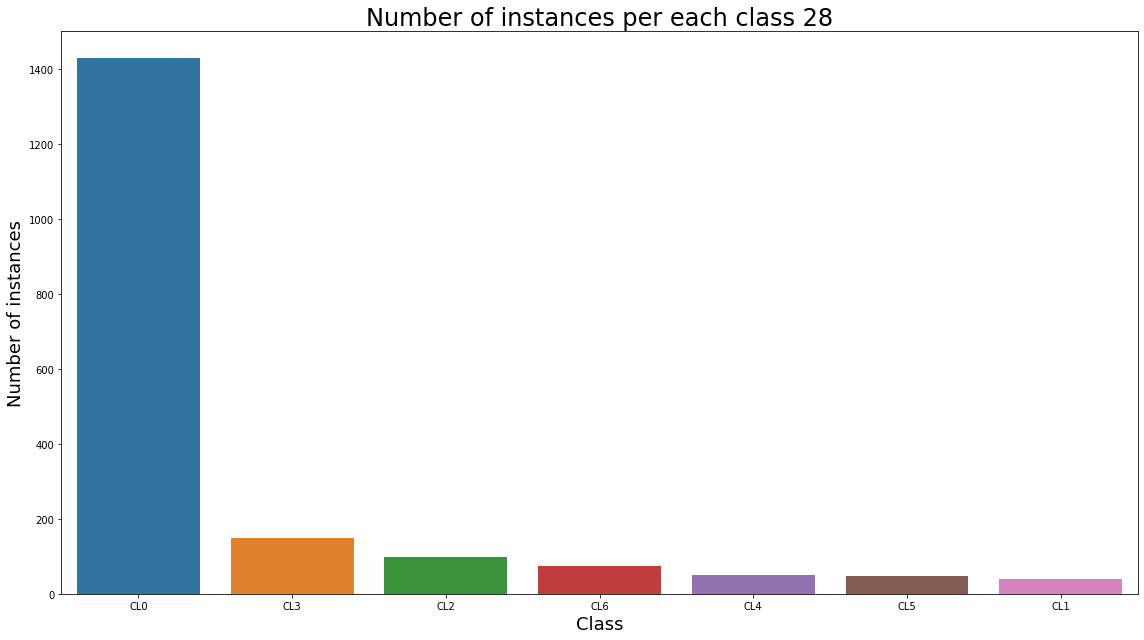

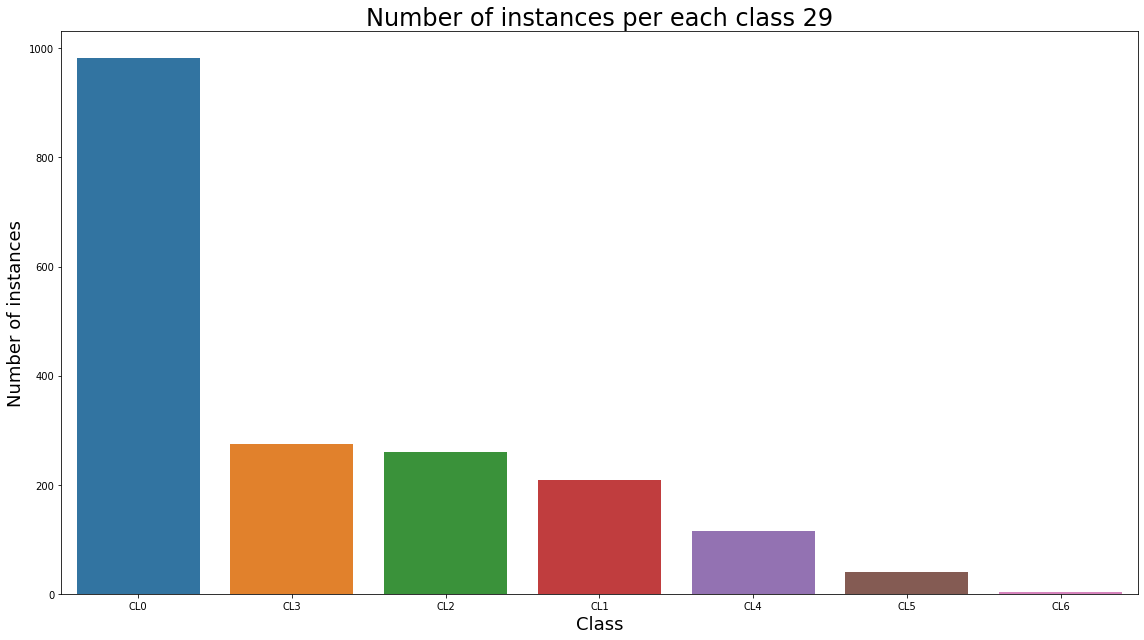

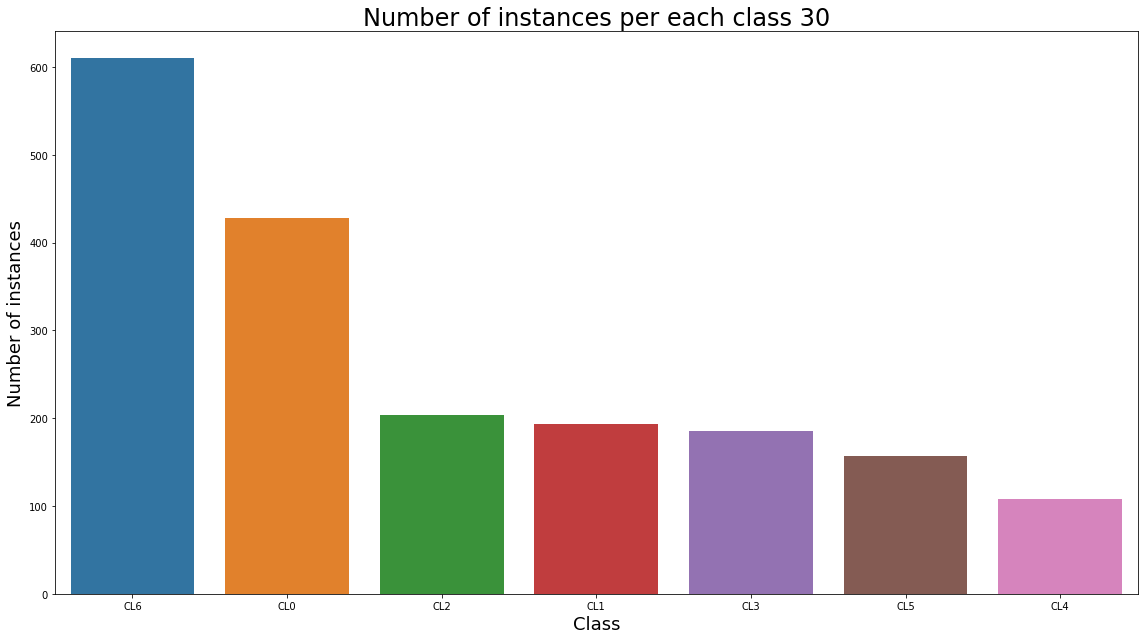

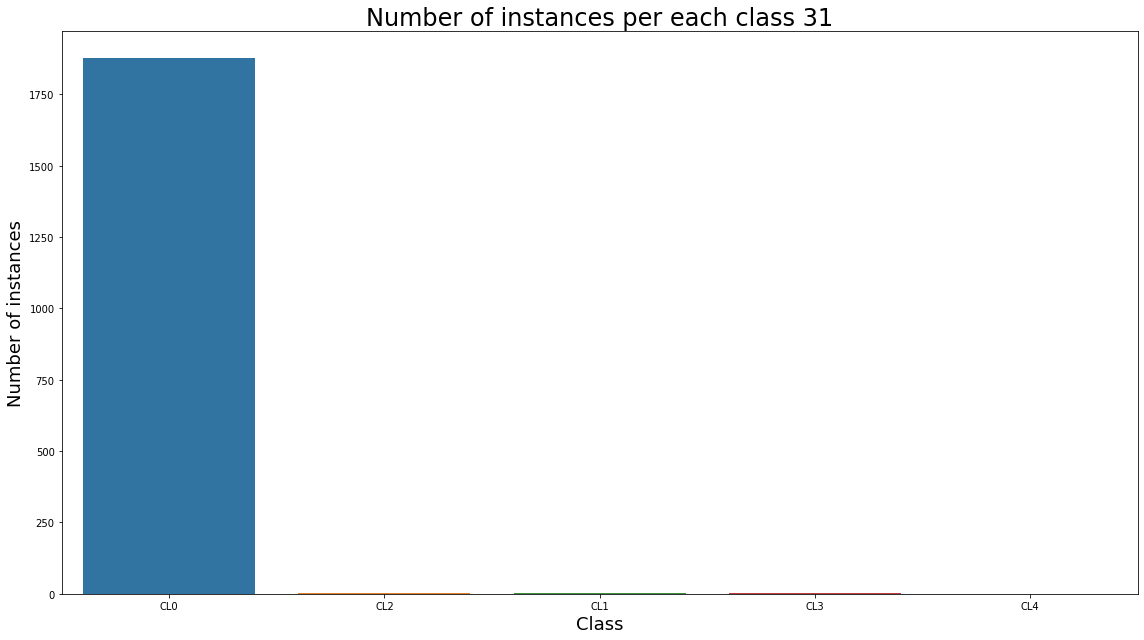

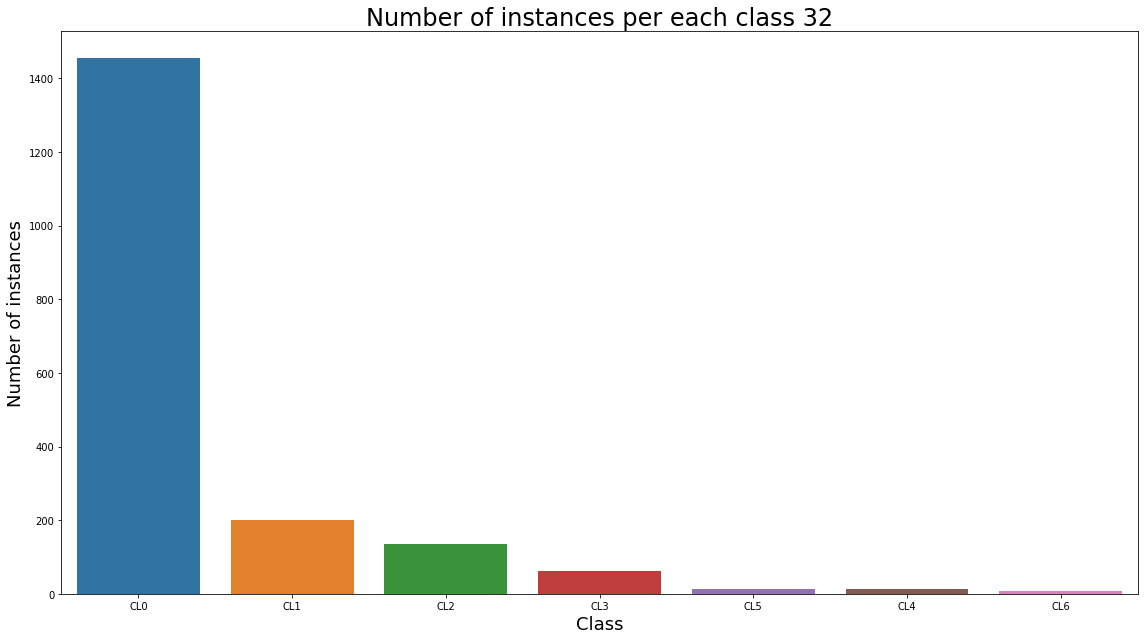

In [4]:
for i in range(0,19):
    array_num_instances = dataset[i+13].value_counts()

    #Bar plot
    plt.subplots(figsize=(16, 9))

    sns.barplot(x=array_num_instances.index, y=array_num_instances)

    plt.title('Number of instances per each class '+str(i+14), fontsize=24)
    plt.xlabel('Class', fontsize=18)
    plt.ylabel('Number of instances', fontsize=18)

    plt.tight_layout()

Očito ni za jednu drogu ne dobijemo balansiran skup, no najbolja situacija je sa varijablom broj 18 tj. sa Cannabisom, pa ćemo onda nju promatrati kao zavisnu varijablu.

Kako je ta varijabla tipa object, treba ju prebaciti u brojevnu vrijednost kako bi mogli koristiti algoritme za klasifikaciju. Također, u narednim linijama koda saznajemo da nema *missing values* u skupu podataka.

In [5]:
#print number of missing values
np.isnan(X).sum()

0

In [6]:
y = dataset.iloc[:,18].values

In [7]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [8]:
#print number of missing values
np.isnan(y).sum()

0

Sada ćemo proanalizirati postoje li neki podaci u skupu koji jako odskaču od ostalih (eng. *outliers*). U tu svrhu koristimo metodu *percentile*. Podatke podijelimo u gornji i donji kvartil te pomoću tog računamo donju i gornju granicu. Svi podaci koji se nađu ispod/iznad te granice su kandidati za *outliere*.

In [9]:
# calculate interquartile range
from numpy import percentile
for i in range(X.shape[1]):
    q25, q75 = percentile(X[:,i], 25), percentile(X[:,i], 75)
    iqr = q75 - q25
    print(str(i)+': Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in X[:,i] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    print(outliers)

0: Percentiles: 25th=-0.952, 75th=0.498, IQR=1.450
Identified outliers: 0
[]
1: Percentiles: 25th=-0.482, 75th=0.482, IQR=0.965
Identified outliers: 0
[]
2: Percentiles: 25th=-0.611, 75th=0.455, IQR=1.066
Identified outliers: 28
[-2.43591, -2.43591, -2.43591, -2.43591, -2.43591, -2.43591, -2.43591, -2.43591, -2.43591, -2.43591, -2.43591, -2.43591, -2.43591, -2.43591, -2.43591, -2.43591, -2.43591, -2.43591, -2.43591, -2.43591, -2.43591, -2.43591, -2.43591, -2.43591, -2.43591, -2.43591, -2.43591, -2.43591]
3: Percentiles: 25th=-0.570, 75th=0.961, IQR=1.531
Identified outliers: 0
[]
4: Percentiles: 25th=-0.317, 75th=-0.317, IQR=0.000
Identified outliers: 165
[0.126, 0.1144, 0.1144, -0.22166, -0.50212, -0.22166, -0.50212, -0.50212, 0.1144, 0.126, -0.50212, -1.1070200000000001, -1.1070200000000001, -1.1070200000000001, -1.1070200000000001, -1.1070200000000001, -1.1070200000000001, 0.1144, 0.126, 0.126, -1.1070200000000001, 0.1144, -0.50212, -0.50212, -1.1070200000000001, -1.1070200000000001

Da bi dobili bolji uvid što se događa, pomaže nam donji graf. Graf je tzv. *pairplot* iz biblioteke *seaborn* i on grafički prikazuje podatke u dvije dimenzije svh mogućih parova danih atributa.

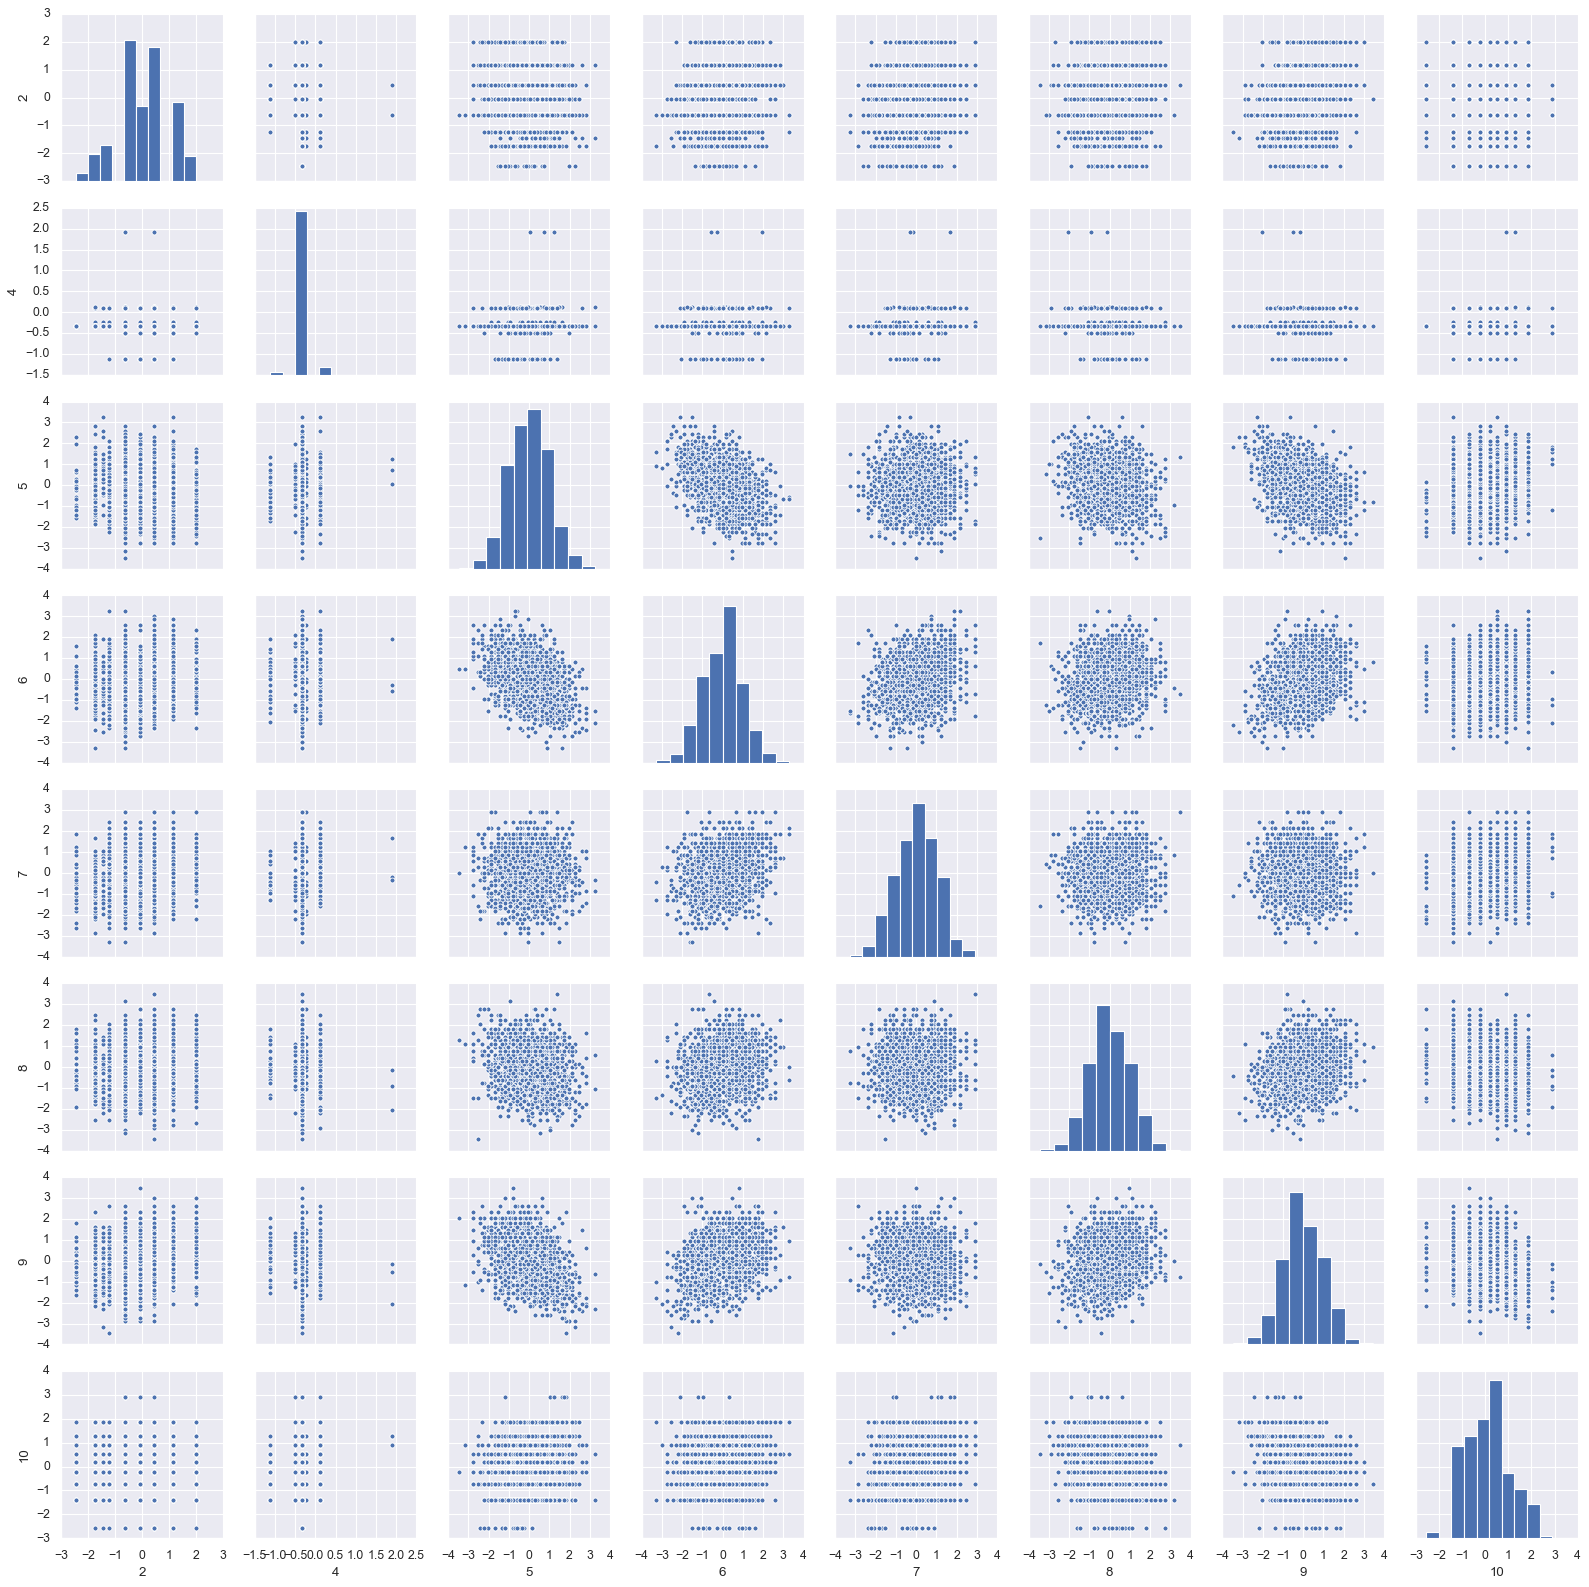

In [10]:
plt.style.use('classic')
X_df = pd.DataFrame(X)
#scatterplot
sns.set()
cols = [2, 4, 5, 6, 7, 8, 9, 10]
sns.pairplot(X_df[cols], height = 2.5)
plt.show();

Jedino što vidno dosta odskače od normale su tri najveća podatka u grafovima četvrte varijable. Dolje su indeksi tih podataka u skupu.

In [11]:
np.where(X[:,4] == X[:,4].max())

(array([ 821, 1059, 1462], dtype=int32),)

U nastavku normaliziramo podatke jer koristimo model strojnog učenja koji u obzir uzima duljine između podataka i zato je bitno provesti taj postupak.

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

Budući da je glavni problem koji se promatra u ovom radu, odabir podskupa značajki tj. odabir bitnih značajki pomoću kojih možemo istrenirati dobar klasifikacijski model, malo ćemo pomnije promotriti vezu između nezavisnih značajki i zavisne tj. cilje varijable koja govori kojoj klasi koji pacijent pripada. <br>
Najčešće se takve veze prikazuju grafom zvanim *heatmap*, također iz biblioteke *seaborn*. Jačina boje sugerira, jačinu veze između značajki. Ako promatramo dvije kontinuirane varijable, onda je najbolje računati njihovu korelaciju. Ako promatramo kategoričke varijable, onda više nema smisla gledati korelaciju jer u tom slučaju nije definirana. Tada promatramo tzv. Kramerov V koeficijent asocijacije. Ako pak promatramo jednu kategoričku i jednu kontinuiranu varijablu, onda računamo njihov *correlation ratio*. Više informacija je na [3]

Kako su sve varijable kategoričke, računat ćemo samo Kramerov V koeficijent.

In [13]:
import scipy.stats as ss
#Function chi2_contigency cannot work if there are missing values
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [14]:
dict_nominal = {}
for i in range(12):
    dict_nominal[i] = cramers_v(y, X[:,i])
matrix = pd.DataFrame.from_dict(dict_nominal, orient='index')

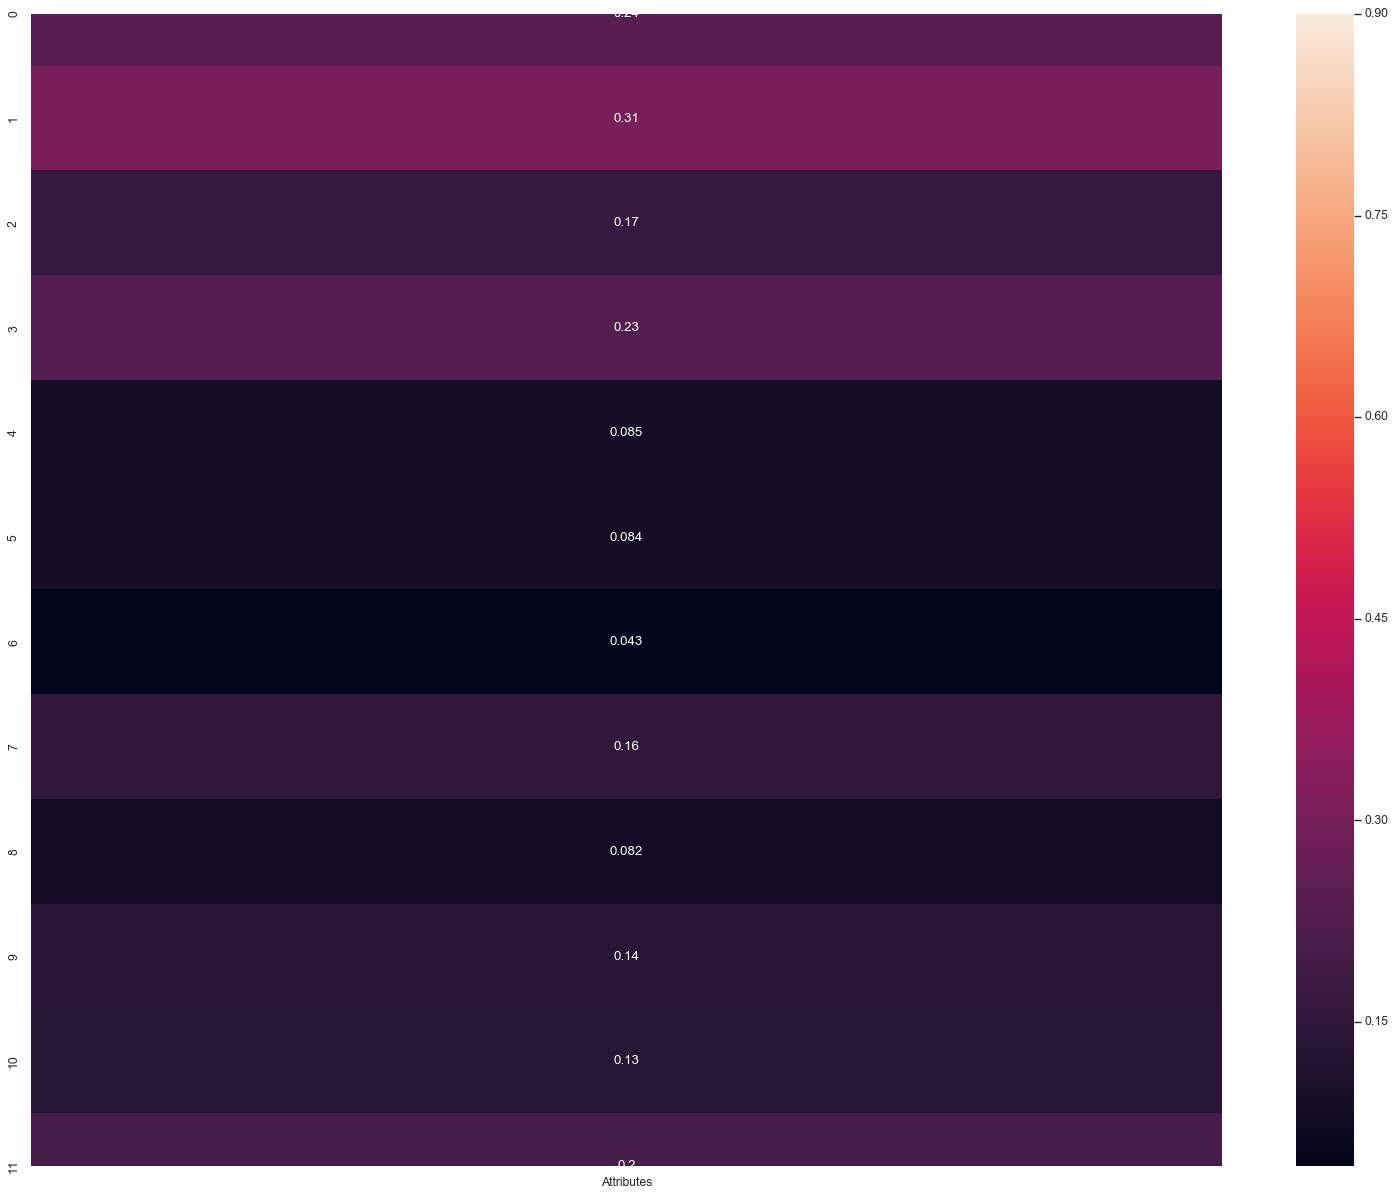

In [15]:
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(matrix, vmax=0.9, annot=True, square=False, yticklabels=matrix.index.values, xticklabels=['Attributes']);

Iz grafa, možemo vidjeti da varijable nisu jako povezane sa ciljnom varijablom. Zbog tog bi mogli očekivati lošije rezultate. Četiri tamno plave varijable se ističu kao najmanje povezane za zavisnom. Po tome bi mogli očekivati da bi naš pčelinji algoritam mogao izbaciti te četiri značajke.

Prije samog algoritma, razdvojimo podatke na one trening i na one testne.

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### BABC

U babc.py su implementirane sve potrebne funckije za algoritam i u bilježnici BABC se nalazi pojašnjenje za svaku funkciju.

In [17]:
import babc

Inicijalizacija potrebnih argumenata za funckije iz babc.py te vrijednosti najboljeg rezultata BEST i pripadnog podskupa značajki prikazanog kao niz nula i jedinica BEST_BEE. Ta varijabla je nazvana BEST_BEE jer je upravo ta pčela tj. to rješenje optimalno u kontekstu pčelinjeg algoritma.

In [18]:
columns_number = X.shape[1]
number_employed_bees = 12
number_onlooker_bees = 12
max_iterations_number = 70
limit = 10
BEST = 0
BEST_BEE = np.zeros(columns_number)

Ranije smo spomenuli balansiranost skupa. Ako skup nije balansiran i ako za mjeru evaluacije klasifikacijskog modela koristimo *accuracy*, može se dogoditi *accuracy paradox* tj. da dobijemo lažnu jako visoku točnost modela jer velik broj podataka pripada jednoj klasi. Više o tome na [4] Postoji dosta načina kako se nositi sa tim problemom, no za naše potrebe koristit ćemo jedan od najjednostavnijih. Koristit ćemo drukčiju evaluacijsku metriku i to jednu od najjednistavnijih koja se dobro nosi sa nebalansiranim podacima, a to je *balanced accuracy*. Više o tom piše u bilježnici BABC.

Na empirijski način, nakon više pokretanja algortima, utvrdila sam da postoji vrijednost rezultata koja se najčešće izbaci kao konačan rezultat i dovoljno je oko tri pokretanja da dobijemo upravo taj rezultat. Zato donju petlju vrtimo tri puta.

Prvo kao klasifikacijski model isprobavamo *K nearest neighbors* i također na empirijski način je utvrđeno da su najbolji rezultati dosad postignuti ako se promatra 7 najbližih susjeda, zato kao argument šaljemo broj 7.

In [19]:
for i in range(3):
    employed_matrix = np.zeros((number_employed_bees,columns_number))
    limit_array = np.zeros(number_employed_bees)
    accuracies = np.zeros(number_employed_bees)
    best = 0
    best_bee = np.zeros(columns_number)
    
    babc.init(number_employed_bees, columns_number, employed_matrix)
    
    babc.init_accuracies_and_best(number_employed_bees, accuracies, X_train, X_test, y_train, y_test, 'KNN', 7, best, best_bee, 
                             employed_matrix, columns_number)
    
    RESULT = babc.iterations(max_iterations_number, limit_array, limit, employed_matrix, number_employed_bees, columns_number, 'KNN', 7, 
                accuracies, number_onlooker_bees, X_train, X_test, y_train, y_test, best, best_bee)
    if (RESULT[0] > BEST):
        BEST = RESULT[0]
        BEST_BEE = RESULT[1]
        
    print(BEST)
    print(BEST_BEE)

0.312073259210861
[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0]
0.312073259210861
[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0]
0.312073259210861
[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0]


Ispišimo i *confusion matrix* najbolje dobivenog rezultata.

In [20]:
from sklearn.metrics import confusion_matrix
#best_bee = np.array([1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0])
k=0
for j in range(0,len(BEST_BEE)):
    if BEST_BEE[j]==1:
        k+=1
X_train_features = np.zeros((X_train.shape[0], k))
X_test_features = np.zeros((X_test.shape[0], k))
        
k=0
for j in range(0,len(BEST_BEE)):
    if BEST_BEE[j]==1:
        X_train_features[:,k]=X_train[:,j]
        X_test_features[:,k]=X_test[:,j]
        k+=1
        
confusion_matrix(y_test, babc.KNN_Classifier(X_train_features, X_test_features, y_train, y_test, 5))

array([[63, 10,  5,  1,  3,  3,  5],
       [22, 10,  4,  2,  0,  0,  5],
       [21,  4,  9,  6,  1,  3,  6],
       [10,  5,  2,  8,  3,  2, 17],
       [ 4,  1,  4,  3,  1,  0, 10],
       [ 4,  2,  3,  1,  4,  6, 13],
       [10,  2,  6, 12,  6, 13, 42]], dtype=int64)

Ako koristimo samo točnost *accuracy*, dobiju se rezultati između 0.75 i 0.8, što je dosta dobro, ali se po matrici vidi da situacija nije baš tako dobra i tu vidimo da *balanced accuracy* puno realnije opisuje dobrotu rezultata.

U nastavku ponavljamo isti postupak samo isprobavamo *Naive Bayes* klasifikaciju.

In [21]:
columns_number = X.shape[1]
number_employed_bees = 12
number_onlooker_bees = 12
max_iterations_number = 70
limit = 10
BEST = 0
BEST_BEE = np.zeros(columns_number)

In [22]:
for i in range(3):
    employed_matrix = np.zeros((number_employed_bees,columns_number))
    limit_array = np.zeros(number_employed_bees)
    accuracies = np.zeros(number_employed_bees)
    best = 0
    best_bee = np.zeros(columns_number)
    
    babc.init(number_employed_bees, columns_number, employed_matrix)
    
    babc.init_accuracies_and_best(number_employed_bees, accuracies, X_train, X_test, y_train, y_test, 'NB', 0, best, best_bee, 
                             employed_matrix, columns_number)
    
    RESULT = babc.iterations(max_iterations_number, limit_array, limit, employed_matrix, number_employed_bees, columns_number, 'NB', 0, 
                accuracies, number_onlooker_bees, X_train, X_test, y_train, y_test, best, best_bee)
    if (RESULT[0] > BEST):
        BEST = RESULT[0]
        BEST_BEE = RESULT[1]
        
    print(BEST)
    print(BEST_BEE)

0.3132459736488859
[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0]
0.3132459736488859
[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0]
0.3132459736488859
[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0]


In [23]:
from sklearn.metrics import confusion_matrix
#best_bee = np.array([1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0])
k=0
for j in range(0,len(BEST_BEE)):
    if BEST_BEE[j]==1:
        k+=1
X_train_features = np.zeros((X_train.shape[0], k))
X_test_features = np.zeros((X_test.shape[0], k))
        
k=0
for j in range(0,len(BEST_BEE)):
    if BEST_BEE[j]==1:
        X_train_features[:,k]=X_train[:,j]
        X_test_features[:,k]=X_test[:,j]
        k+=1
        
confusion_matrix(y_test, babc.NB_Classifier(X_train_features, X_test_features, y_train, y_test))

array([[36, 41,  8,  2,  0,  0,  3],
       [ 8, 26,  7,  0,  0,  0,  2],
       [11, 15, 14,  3,  0,  0,  7],
       [ 6,  7,  8, 10,  0,  3, 13],
       [ 2,  1,  1,  2,  0,  1, 16],
       [ 0,  4,  2,  8,  0,  3, 16],
       [ 1, 15,  6, 10,  0,  4, 55]], dtype=int64)

Dobijemo nešto bolji rezultat koristeći *Naive Bayes* klasifikaciju. Koristeći KNN, algoritam se "vrti" jako dugo, no s NB to vrijeme je puno kraće.

Pokušajmo sada izbaciti tri spomenuta potencijalna *outliera* i provjerimo hoćemo li dobiti bolji rezultat.

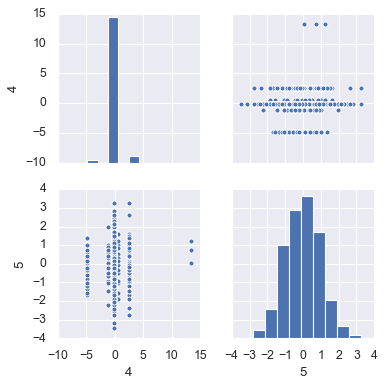

In [24]:
plt.style.use('classic')
X_df = pd.DataFrame(X)
#scatterplot
sns.set()
cols = [4, 5]
sns.pairplot(X_df[cols], height = 2.5)
plt.show();

In [25]:
y = np.delete(y, (np.where(X[:,4] == X[:,4].max())))
X = np.delete(X, (np.where(X[:,4] == X[:,4].max())), axis=0)

Uvjerimo se po grafu jesmo li stvarno uspjeli izbaciti podatak.

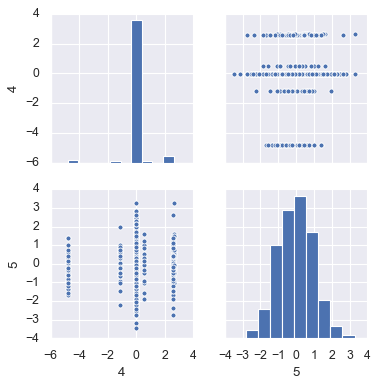

In [26]:
plt.style.use('classic')
X_df = pd.DataFrame(X)
#scatterplot
sns.set()
cols = [4, 5]
sns.pairplot(X_df[cols], height = 2.5)
plt.show();

In [27]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
columns_number = X.shape[1]
number_employed_bees = 12
number_onlooker_bees = 12
max_iterations_number = 70
limit = 10
BEST = 0
BEST_BEE = np.zeros(columns_number)

In [29]:
for i in range(3):
    employed_matrix = np.zeros((number_employed_bees,columns_number))
    limit_array = np.zeros(number_employed_bees)
    accuracies = np.zeros(number_employed_bees)
    best = 0
    best_bee = np.zeros(columns_number)
    
    babc.init(number_employed_bees, columns_number, employed_matrix)
    
    babc.init_accuracies_and_best(number_employed_bees, accuracies, X_train, X_test, y_train, y_test, 'NB', 0, best, best_bee, 
                             employed_matrix, columns_number)
    
    RESULT = babc.iterations(max_iterations_number, limit_array, limit, employed_matrix, number_employed_bees, columns_number, 'NB', 0, 
                accuracies, number_onlooker_bees, X_train, X_test, y_train, y_test, best, best_bee)
    if (RESULT[0] > BEST):
        BEST = RESULT[0]
        BEST_BEE = RESULT[1]
        
    print(BEST)
    print(BEST_BEE)

0.31283068698068345
[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0]
0.3132459736488859
[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0]
0.3132459736488859
[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0]


Ne dobijemo bolji rezultat nakon izbacivanja...

Kako bi usporedili "naš" pčelinji algoritam za *feature selection*, provjerit ćemo kakav rezultat dobijemo kad koristimo jedan od najčešće korištenih algoritama u tu svrhu *principal component analysis*. Promotrit ćemo onoliko rezultata koliko ima nezavisnih varijabli. Krećemo od rezultata kad se klasificira uz pomoć samo jedne, po PCA kriterijima, najvažnije značajke, zatim rezultat koji se dobije ako koristimo dvije najvažnije značajke i tako dalje. Zadnji je rezultat kad koristimo sve nezavisne varijable.

In [30]:
from sklearn.metrics import balanced_accuracy_score
def principal_component_analysis(X_train, X_test, columns_number, y_train, y_test, algorithm, n):
    for i in range(1,columns_number+1):

        X_train_temp = np.copy(X_train)
        X_test_temp = np.copy(X_test)  

        # Applying PCA
        from sklearn.decomposition import PCA
        pca = PCA(n_components = i)
        X_train_temp = pca.fit_transform(X_train_temp)
        X_test_temp = pca.transform(X_test_temp)
        explained_variance = pca.explained_variance_ratio_
        if(algorithm == 'KNN'):
            score = balanced_accuracy_score(y_test, babc.KNN_Classifier(X_train_temp, X_test_temp, y_train, y_test, n))
        elif(algorithm == 'RF'):
            score = balanced_accuracy_score(y_test, babc.RF_Classifier(X_train_temp, X_test_temp, y_train, y_test, n))
        elif(algorithm == 'NB'):
            score = balanced_accuracy_score(y_test, babc.NB_Classifier(X_train_temp, X_test_temp, y_train, y_test))
        else:
            raise ValueError('Key word is not recognized.')
        
        print(score)

    print('Explained variance: ')
    print(explained_variance)

In [31]:
principal_component_analysis(X_train, X_test, columns_number, y_train, y_test, 'NB', 0)

0.24442351299494156
0.25012035583464154
0.252394906680621
0.25936159079016224
0.2956615661146657
0.29689198700579206
0.287515833443592
0.29005729958016657
0.29244932615823976
0.29436354690951605
0.29002241383099514
0.3058795995362052
Explained variance: 
[0.23825193 0.1560334  0.09608757 0.08880946 0.08375249 0.07230232
 0.06343398 0.05330011 0.0448183  0.04354882 0.03247772 0.02718389]


In [32]:
principal_component_analysis(X_train, X_test, columns_number, y_train, y_test, 'KNN', 7)

0.26859700376033535
0.23404147794219737
0.22589606022418635
0.2549002809510338
0.26379390982825107
0.271248369814543
0.28776487886288393
0.25983939996011995
0.24916793041821853
0.26406685465991325
0.25274259869863175
0.2686887935152585
Explained variance: 
[0.23825193 0.1560334  0.09608757 0.08880946 0.08375249 0.07230232
 0.06343398 0.05330011 0.0448183  0.04354882 0.03247772 0.02718389]


Po dobivenim rezultatima, možemo zaključiti da pčelinji algoritam pronađe značajke s kojima se postiže bolja točnost klasifikacije nego što se postiže s PCA algoritmom.

# Literatura

[1] [Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29) <br>

[2] [B. Subanya, R. R. Rajalaxmi, A Novel Feature Selection Algorithm for Heart Disease
Classification, International Journal of Computational Intelligence and Informatics,
Vol. 4, No. 2, 2014.](https://www.periyaruniversity.ac.in/ijcii/issue/Vol4No2September2014/IJCII-4-2-144.pdf) <br>

[3] [The Search for Categorical Correlation](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9) <br>

[4] [8 Tactics to Combat Imbalanced Classes in Your Machine Learning Dataset](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/)